In [2]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from collections import Counter
from skimage import feature
import numpy as np
import cv2

##### We considered

Intensity
Solidity
#Edges

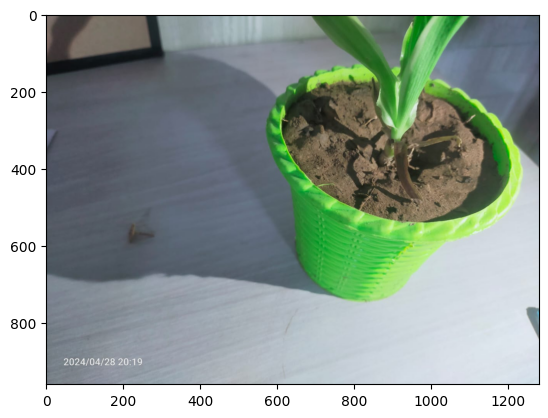

In [6]:
image = cv2.imread('../Images/cam_image2.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

#### Shadow Removal from Scanned Image

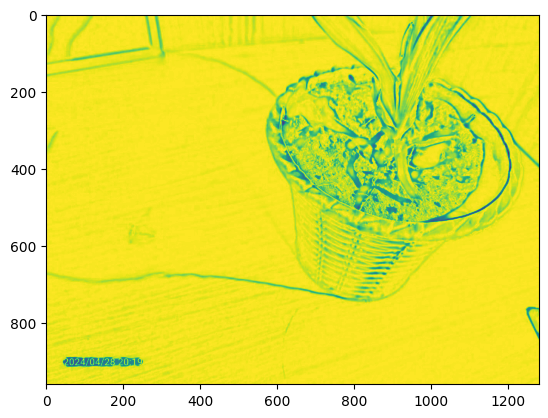

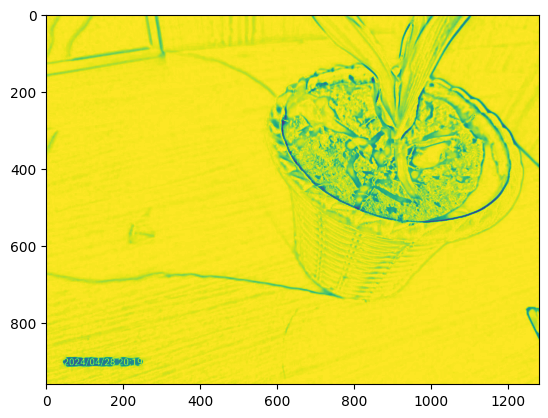

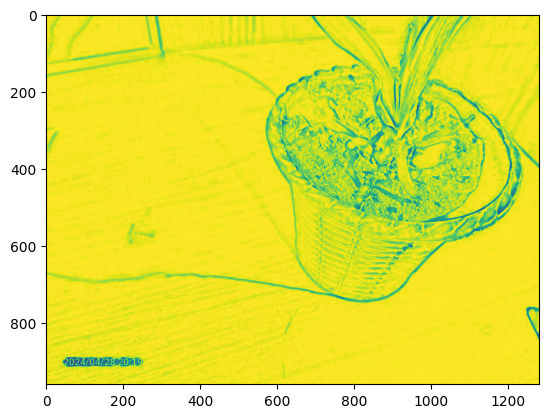

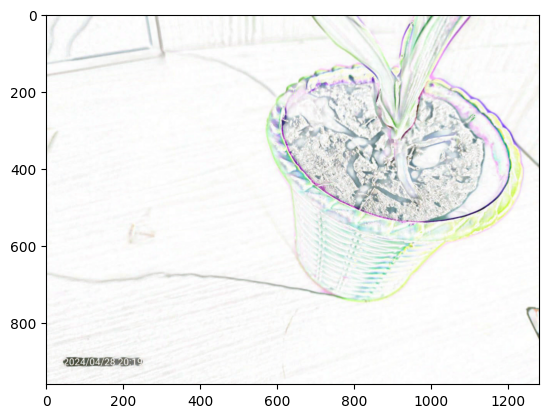

In [7]:
rgb_planes = cv2.split(image)

result_planes = []
result_norm_planes = []

for plane in rgb_planes:

    dilated_image = cv2.dilate(plane,np.ones((7,7),np.uint8))

    bg_img = cv2.medianBlur(dilated_image,21)
    diff_img = 255 - cv2.absdiff(plane,bg_img)

    norm_img = cv2.normalize(diff_img,None,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8UC1)
    plt.imshow(norm_img)
    plt.show()
    result_norm_planes.append(norm_img)

result_norm = cv2.merge(result_norm_planes)
plt.imshow(result_norm)